# Ejercicio 3
## **a)** Determinación de coeficientes de filtro de orden 25 con método de la ventana usando ventana rectangular

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, sinc, log10, unwrap, angle
from numpy.fft import fft, fftshift
from scipy.signal.windows import get_window

In [98]:
def make_hd(order, omega_c, window='rect', pos=False):
    M = order + 1
    L = 64 if M < 64 else 2*M
    n = np.arange(L)
    w = np.zeros(L)
    if window == 'rect':
        w[:M] = 1
    else:
        w[:M] = get_window(window, M, fftbins=False)
    N = 1024
    W = fft(w, N)
    omega = np.linspace(-pi, pi, N)

    D = (M-1)//2 if M % 2 else M//2 -1 + pos
    hd = (omega_c / pi) * sinc(omega_c * (n - D) / pi)
    Hd = fftshift(fft(hd,N))
    h = w * hd
    H = fftshift(fft(h, N))

    return {"omega": omega, "n": n, "w":w, "W":W, "h": h, "H": H, "hd":hd, "Hd": Hd}


In [99]:
def sunwrap(phase):
    # Symetric unwrap for phase responses that span negative and positive frecuencies
    L = len(phase)
    if L % 2:
        mid = (L-1)//2
    else:
        mid = L//2
    neg, pos = phase[:mid], phase[mid:]
    np.flip(neg)
    unwrap(neg)
    np.flip(neg)
    unwrap(pos)
    return np.concatenate([neg,pos])

In [100]:
order = 24
numtaps = order + 1
rect = make_hd(order, pi/6, window='rect')
print('b = ', rect["h"][:numtaps])

b =  [-6.49695305e-18 -1.44686312e-02 -2.75664448e-02 -3.53677651e-02
 -3.44580560e-02 -2.27364204e-02  6.49695305e-18  3.18309886e-02
  6.89161119e-02  1.06103295e-01  1.37832224e-01  1.59154943e-01
  1.66666667e-01  1.59154943e-01  1.37832224e-01  1.06103295e-01
  6.89161119e-02  3.18309886e-02  6.49695305e-18 -2.27364204e-02
 -3.44580560e-02 -3.53677651e-02 -2.75664448e-02 -1.44686312e-02
 -6.49695305e-18]


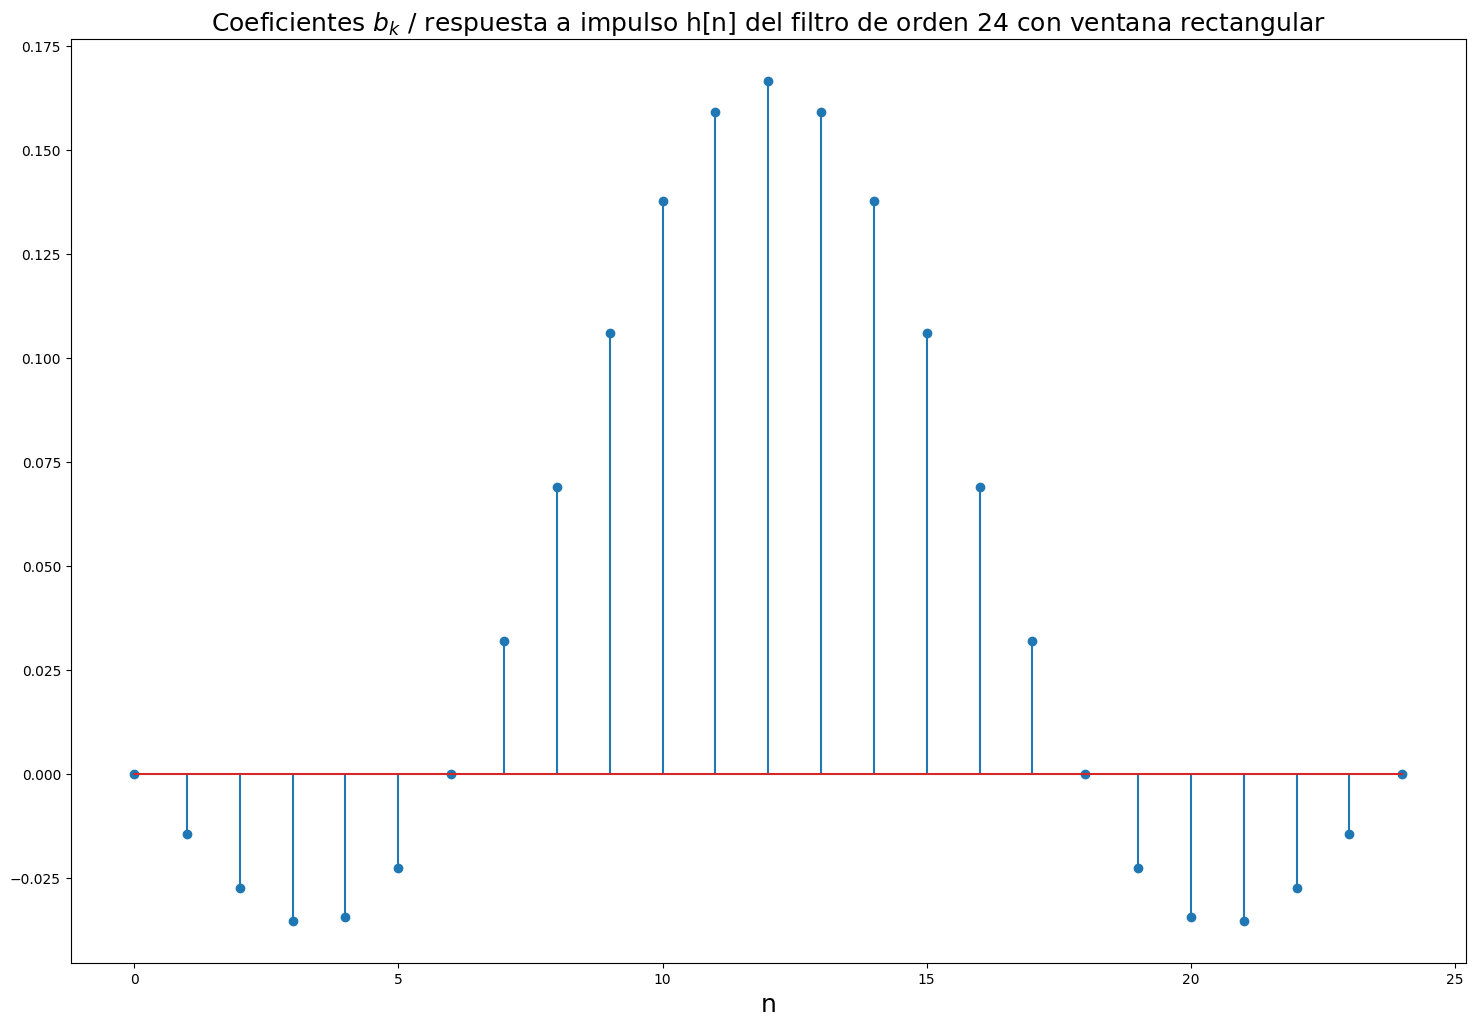

In [101]:
fig, axs = plt.subplots(1, 1, figsize=(18,12))
axs.stem(rect["n"][:numtaps], rect["h"][:numtaps])
axs.set_title(f'Coeficientes $b_k$ / respuesta a impulso h[n] del filtro de orden {order} con ventana rectangular', fontsize=18)
axs.set_xlabel('n', fontsize=18)
plt.show()

##  **b) y c)** Comparaciones respuesta en frecuencia de filtros con ventanas rectangular y hamming vs filtro ideal

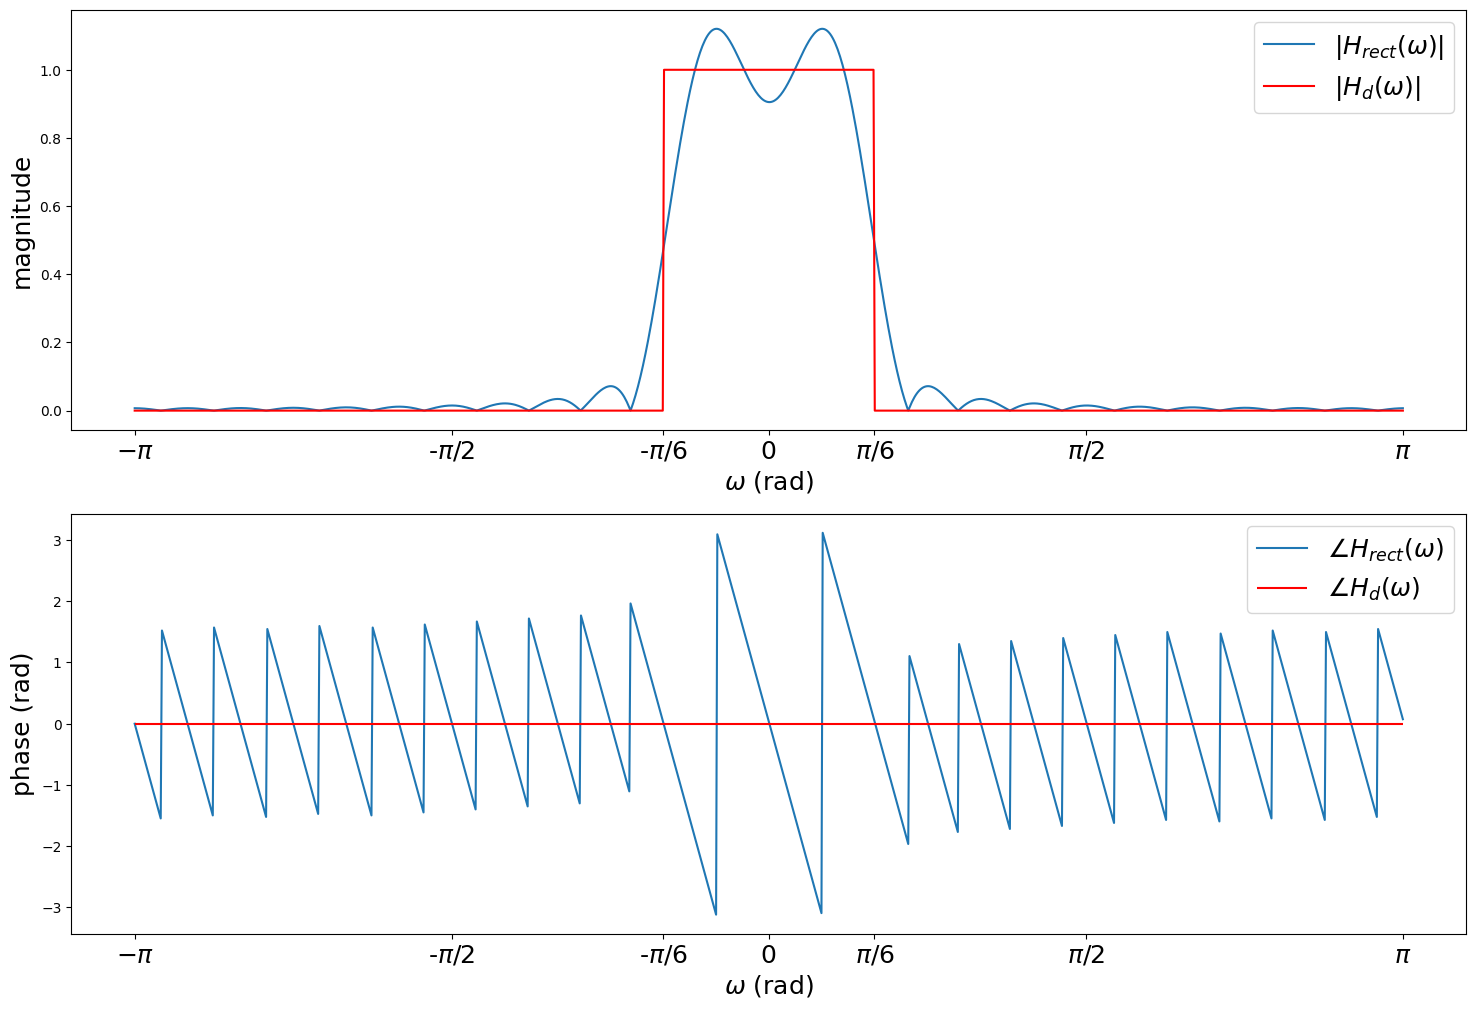

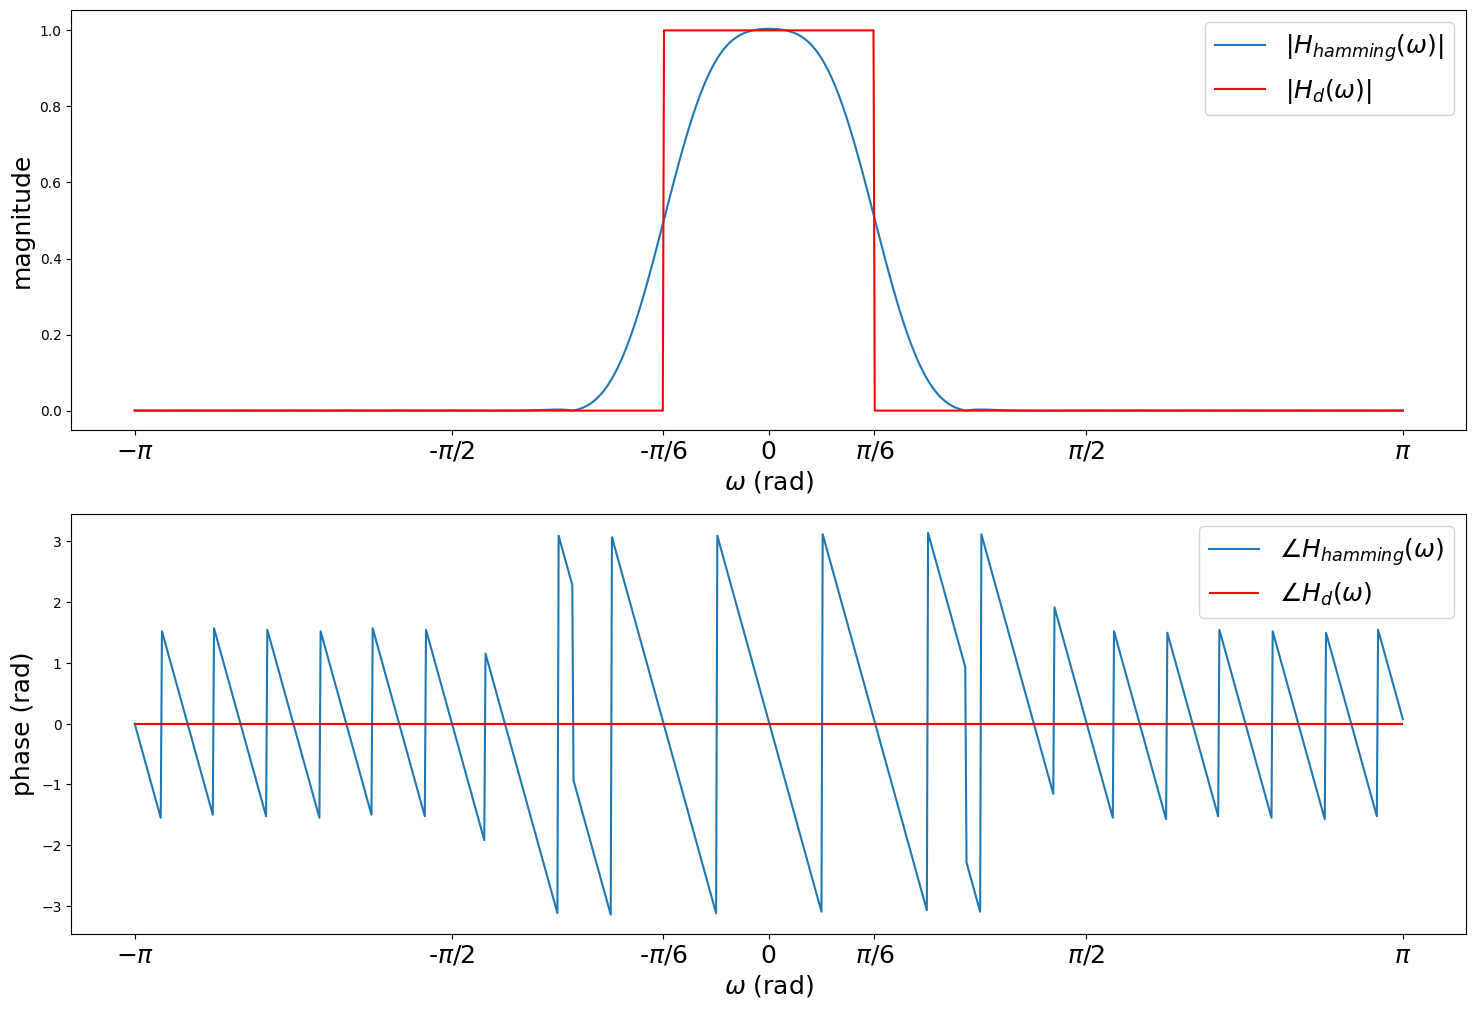

In [102]:
wbase = ['rect', 'hamming']
wextra = ['hann', 'blackman', 'blackmanharris', 'triang', 'boxcar', 'bartlett', 'flattop',
          'parzen', 'bohman', 'nuttall', 'barthann','cosine', 'exponential', 'tukey', 'taylor']

allwindows = False
windows = wbase + wextra if allwindows else wbase

for window in windows: 

    bag = make_hd(order, pi/6, window=window)
    fig, axs = plt.subplots(2, 1, figsize=(18,12))

    axs[0].plot(bag["omega"], abs((bag["H"])))
    axs[0].plot(bag["omega"], abs(bag["omega"]) <= pi/6, 'r')

    wlabel = [r'$|H_{' + window + r'}(\omega)|$', r'$\angle H_{' + window + r'}(\omega)$']

    axs[0].legend([wlabel[0], r'$|H_{d}(\omega)|$'], fontsize=18)
    axs[0].set_xlabel(r'$\omega$ (rad)',fontsize=18)
    axs[0].set_xticks([-pi, -pi/2, -pi/6, 0, pi/6, pi/2, pi])
    axs[0].set_xticklabels([r'$-\pi$', r'-$\pi$/2', r'-$\pi$/6', '0', r'$\pi$/6', r'$\pi$/2', r'$\pi$'],fontsize=18)
    axs[0].set_ylabel("magnitude",fontsize=18)

    axs[1].plot(bag["omega"], sunwrap(angle(bag["H"])))
    axs[1].hlines(y=0, xmin=-pi, xmax=pi, color='r')

    axs[1].legend([wlabel[1], r'$\angle H_{d}(\omega)$'], fontsize=18)
    axs[1].set_xlabel(r'$\omega$ (rad)', fontsize=18)
    axs[1].set_xticks([-pi, -pi/2, -pi/6, 0, pi/6, pi/2, pi])
    axs[1].set_xticklabels([r'$-\pi$', r'-$\pi$/2', r'-$\pi$/6', '0', r'$\pi$/6', r'$\pi$/2', r'$\pi$'],fontsize=18)
    axs[1].set_ylabel("phase (rad)",fontsize=18)
    plt.show()

## Visualización de ventanas

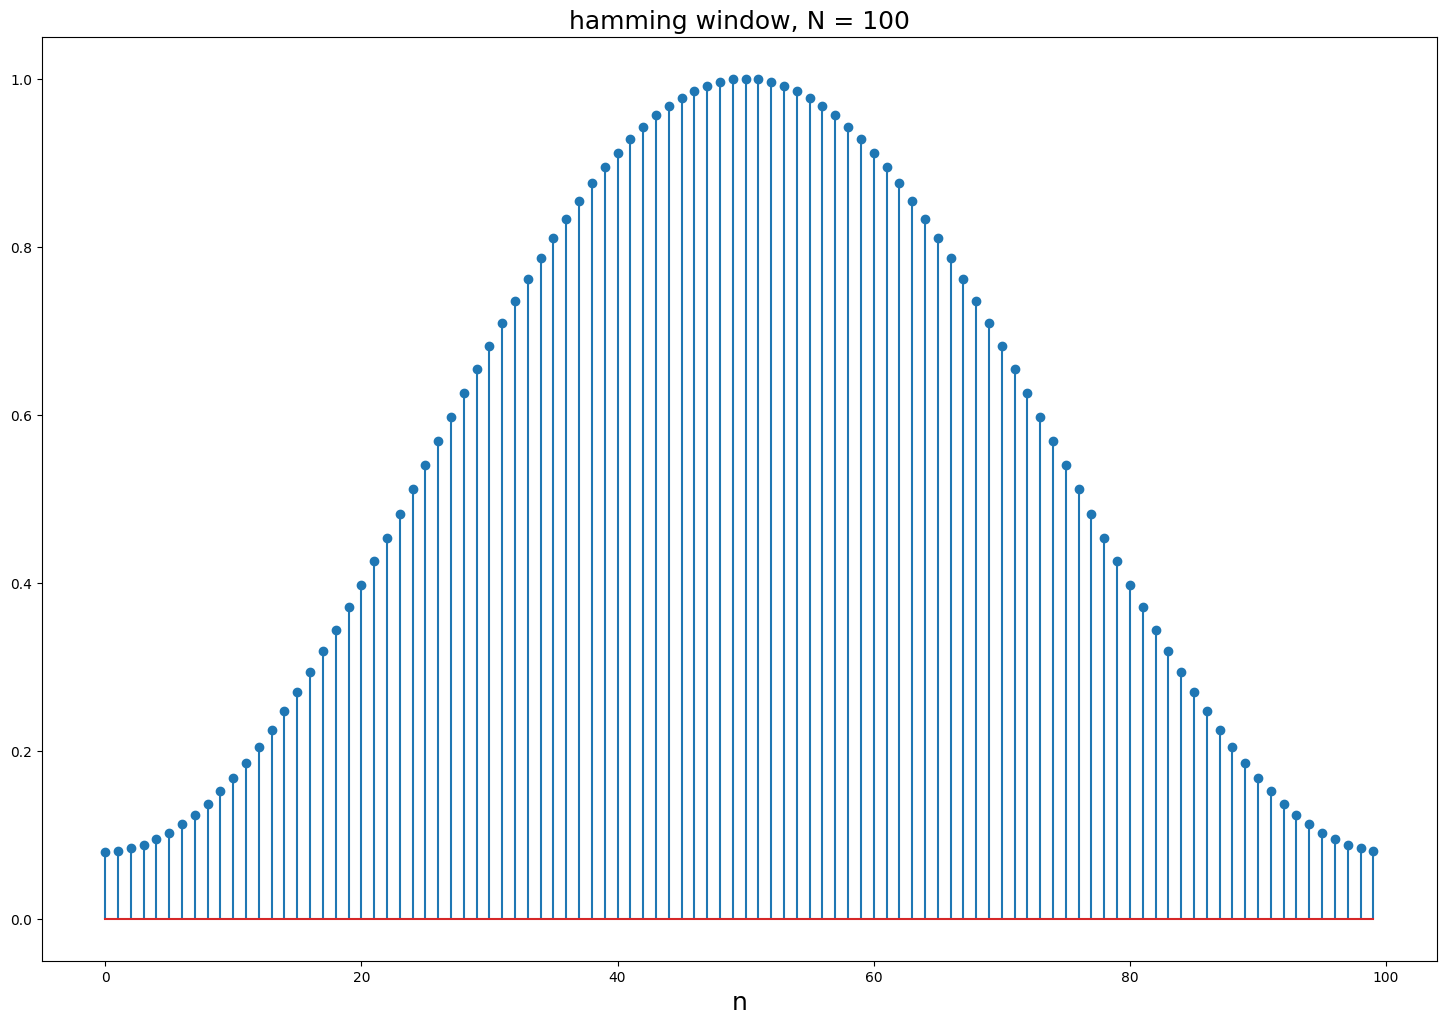

In [103]:
N = 100
for window in windows[1:]:
    w = get_window(window, N)
    fig, axs = plt.subplots(1,1,figsize=(18,12))
    axs.stem(w)
    axs.set_xlabel('n', fontsize=18)
    axs.set_title(f'{window} window, N = {N}', fontsize=18)